# SparkCognition - Response to Marketing Campaign

## Table of Contents
* [Assignment](#Assignment)
* [Data Description](#Data-Description)
* [Data Exploration](#Data-Exploration)
* [Train Test Split](#Train-Test-Split)

## Assignment

You are working for SparkCognition as a Data Scientist. SparkCognition has been commissioned by an insurance company to develop a tool to optimize their marketing efforts. They have given us a data set as a result of an email marketing campaign. The data set includes customer information, described below, as well as whether the customer responded to the marketing campaign or not.

Design a model that will be able to predict whether a customer will respond to the marketing campaign based on his/her information. In other words, predict the responded target variable described above based on all the input variables provided.

Briefly answer the following questions:

1. Describe your model and why did you choose this model over other types of models?
2. Describe any other models you have tried and why do you think this model preforms better?
3. How did you handle missing data?
4. How did you handle categorical (string) data?
5. How did you handle unbalanced data?
6. How did you test your model?

## Data Description
**Files:**

`marketing_training.csv` = Contains the training set that you will use to build the model. The target variable is responded.


`marketing_test.csv` = Contains testing data where the input variables are provided but not the responded target column.

**Descriptions of each column:** 


`custAge` = The age of the customer (in years)


`profession` = Type of job


`marital` = Marital status


`schooling` = Education level


`default` = Has a previous defaulted account?


`housing` = Has a housing loan?


`contact` = Preferred contact type


`month` = Last contact month


`day_of_week` = Last contact day of week


`ampaign` = Number of times the customer was contacted


`pdays` = Number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previous contacted)


`previous` = Number of contacts performed before this campaign for this client


`poutcome` = Outcome of the previous marketing campaign


`emp.var.rate` = Employment variation rate - quartlerly indicator


`cons.price.idx` = Consumer price index - monthly indicator


`cons.conf.idx` = Consumer confidence index - monthly indicator


`euribor3m` = Euribor 3 months rate - daily indicator


`nr.employed` = Number of employees - quarterly indicator


`pmonths` = Number of months that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previous contacted)


`pastEmail` = Number of previous emails sent to this user


`responded` = Did the customer respond to the marketing campaign and purchase a policy?


## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
marketing_training = pd.read_csv('marketing_training.csv')
marketing_training.head(3)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no


In [68]:
marketing_test = pd.read_csv('marketing_test.csv')
marketing_test.head(3)

,Unnamed: 0,custAge,profession,marital,schooling,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,0,NaN,entrepreneur,married,university.degree,no,yes,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,999.0,0
1,1,58.0,entrepreneur,married,university.degree,unknown,no,no,telephone,jun,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,999.0,0
2,2,48.0,entrepreneur,married,NaN,no,no,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0


In [69]:
marketing_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7414 non-null   object 
 2   marital         7414 non-null   object 
 3   schooling       5259 non-null   object 
 4   default         7414 non-null   object 
 5   housing         7414 non-null   object 
 6   loan            7414 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

We have so many NULL values. 

In [70]:
marketing_training.nunique()

custAge            72
profession         12
marital             4
schooling           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           33
pdays              21
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         272
nr.employed        11
pmonths            21
pastEmail          16
responded           2
dtype: int64

In [71]:
marketing_training['responded'].unique()

array(['no', 'yes'], dtype=object)

In [72]:
marketing_training['responded'].loc[marketing_training['responded'] == 'no'] = 0
marketing_training['responded'].loc[marketing_training['responded'] == 'yes'] = 1
marketing_training['responded'] = marketing_training['responded'].astype('int64')

/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_7830/3775155180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['responded'].loc[marketing_training['responded'] == 'no'] = 0
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_7830/3775155180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['responded'].loc[marketing_training['responded'] == 'yes'] = 1


Responded(0 = no, 1 = yes): [0 1]


[Text(0, 0, '6574'), Text(0, 0, '840')]

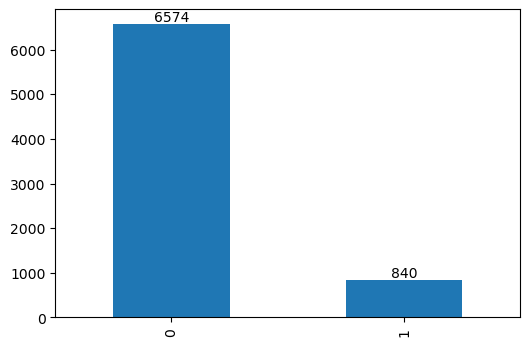

In [73]:
print(f'Responded(0 = no, 1 = yes): {marketing_training.responded.unique()}')

# Visualize the distribution of each category
ax = marketing_training['responded'].value_counts().plot(kind='bar', figsize=(6,4))
ax.bar_label(ax.containers[0])

In [74]:
marketing_training['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [75]:
marketing_training['housing'].loc[marketing_training['housing'] == 'unknown'] = 0
marketing_training['housing'].loc[marketing_training['housing'] == 'no'] = 1
marketing_training['housing'].loc[marketing_training['housing'] == 'yes'] = 2
marketing_training['housing'] = marketing_training['housing'].astype('int64')

/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_7830/300400647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['housing'].loc[marketing_training['housing'] == 'unknown'] = 0
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_7830/300400647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['housing'].loc[marketing_training['housing'] == 'no'] = 1
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_7830/300400647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

Housing(0 = unknown, 1 = no, 2 = yes): [1 2 0]


[Text(0, 0, '3840'), Text(0, 0, '3406'), Text(0, 0, '168')]

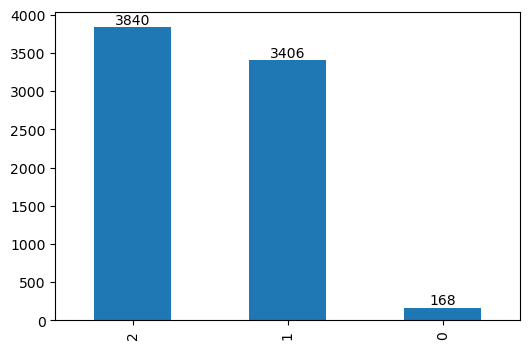

In [76]:
print(f'Housing(0 = unknown, 1 = no, 2 = yes): {marketing_training.housing.unique()}')

# Visualize the distribution of each category
ax = marketing_training['housing'].value_counts().plot(kind='bar', figsize=(6,4))
ax.bar_label(ax.containers[0])

In [77]:
marketing_training['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [78]:
marketing_training['loan'].loc[marketing_training['loan'] == 'unknown'] = 0
marketing_training['loan'].loc[marketing_training['loan'] == 'no'] = 1
marketing_training['loan'].loc[marketing_training['loan'] == 'yes'] = 2
marketing_training['loan'] = marketing_training['loan'].astype('int64')

/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_7830/1756731846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['loan'].loc[marketing_training['loan'] == 'unknown'] = 0
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_7830/1756731846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['loan'].loc[marketing_training['loan'] == 'no'] = 1
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_7830/1756731846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

Loan(0 = unknown, 1 = no, 2 = yes): [1 2 0]


[Text(0, 0, '6099'), Text(0, 0, '1147'), Text(0, 0, '168')]

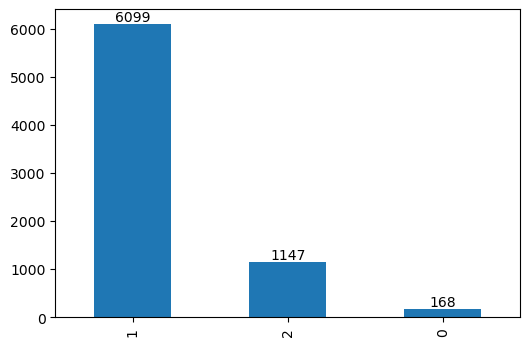

In [79]:
print(f'Loan(0 = unknown, 1 = no, 2 = yes): {marketing_training.loan.unique()}')

# Visualize the distribution of each category
ax = marketing_training['loan'].value_counts().plot(kind='bar', figsize=(6,4))
ax.bar_label(ax.containers[0])

In [80]:
marketing_training['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [81]:
marketing_training['poutcome'].loc[marketing_training['poutcome'] == 'nonexistent'] = 0
marketing_training['poutcome'].loc[marketing_training['poutcome'] == 'failure'] = 1
marketing_training['poutcome'].loc[marketing_training['poutcome'] == 'success'] = 2
marketing_training['poutcome'] = marketing_training['poutcome'].astype('int64')

/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_7830/723239589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['poutcome'].loc[marketing_training['poutcome'] == 'nonexistent'] = 0
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_7830/723239589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing_training['poutcome'].loc[marketing_training['poutcome'] == 'failure'] = 1
/var/folders/9q/jfjy60yj2tb9g_kpwyt_g0b80000gn/T/ipykernel_7830/723239589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

Poutcome(0 = nonextistent, 1 = failure, 2 = success): [0 1 2]


[Text(0, 0, '6350'), Text(0, 0, '800'), Text(0, 0, '264')]

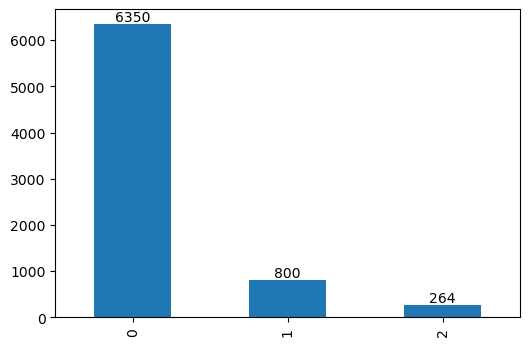

In [82]:
print(f'Poutcome(0 = nonextistent, 1 = failure, 2 = success): {marketing_training.poutcome.unique()}')

# Visualize the distribution of each category
ax = marketing_training['poutcome'].value_counts().plot(kind='bar', figsize=(6,4))
ax.bar_label(ax.containers[0])

In [83]:
month = pd.get_dummies(marketing_training['month'])
month.head(3)

,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0


In [84]:
day_of_week = pd.get_dummies(marketing_training['day_of_week'])
day_of_week.head(3)

,fri,mon,thu,tue,wed
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0


In [85]:
profession = pd.get_dummies(marketing_training['profession'])
profession.head(3)

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0


In [86]:
marital = pd.get_dummies(marketing_training['marital'])
marital.head(3)

,divorced,married,single,unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0


In [87]:
marketing_training['schooling'].unique()

array(['university.degree', nan, 'high.school', 'basic.4y', 'basic.9y',
       'professional.course', 'basic.6y', 'unknown', 'illiterate'],
      dtype=object)

In [18]:
marketing_training = marketing_training.dropna()
marketing_test = marketing_test.dropna()

In [61]:
marketing_training = marketing_training.drop(['schooling', 'default', 'contact', 'day_of_week'], axis = 1)

In [62]:
marketing_training

,custAge,housing,loan,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.0,no,no,nov,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
1,NaN,no,no,jul,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
2,42.0,no,no,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
3,55.0,yes,yes,jul,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
4,NaN,yes,no,may,5,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,33.0,no,no,may,3,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,999.0,0,no
7410,45.0,no,no,jul,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0,no
7411,27.0,no,no,may,2,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,999.0,3,no
7412,51.0,yes,no,nov,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,999.0,0,no


## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [55]:
X = marketing_training.drop(['responded'], axis = 1)
y = marketing_training['responded']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 2865 and the size of test data is 717


## Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [58]:
tree = DecisionTreeClassifier(random_state = 42)

tree.fit(X_train, y_train)

y_predict = tree.predict(X_test)

ValueError: could not convert string to float: 'may'

In [ ]:
# Instantiate Decision Tree Classifier with default hyperparameter settings
tree = DecisionTreeClassifier(random_state=2)

# Train the classifier on the training data
tree.fit(X_train, y_train)

# Predict the test data with trained tree classifier
y_predict = tree.predict(X_test)

# Print accuracy and classification report on test data
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix on test data
fig, ax = plt.subplots(figsize=(12, 9))
plot_confusion_matrix(tree, X_test, y_test, cmap ='cividis', ax=ax)

In [ ]:

from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [43]:
marketing_training['profession'] = marketing_training['profession'].astype('category')

In [44]:
marketing_training.dtypes

custAge            float64
profession        category
marital             object
schooling           object
default             object
housing              int64
loan                 int64
contact             object
month               object
day_of_week         object
campaign             int64
pdays                int64
previous             int64
poutcome             int64
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
pmonths            float64
pastEmail            int64
responded            int64
dtype: object

In [52]:
marketing_training.nunique()

custAge            70
profession         12
marital             4
schooling           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           31
pdays              18
previous            6
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         222
nr.employed        11
pmonths            18
pastEmail          14
responded           2
dtype: int64